In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



# data preproccesing library
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,accuracy_score

# model builing
from sklearn.model_selection import train_test_split,cross_validate
from xgboost import XGBClassifier
import lightgbm as lgb

In [ ]:
data=pd.read_csv("Titanic_train.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### We use the dropna method to drop the missing values

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
data.dropna(subset=["Embarked"],inplace=True)

In [ ]:
data["Age"].unique()

array([38.  , 35.  , 54.  ,  4.  , 58.  , 34.  , 28.  , 19.  , 49.  ,
       65.  , 45.  , 29.  , 25.  , 23.  , 46.  , 71.  , 21.  , 47.  ,
       24.  , 32.5 , 37.  , 36.5 , 22.  , 61.  , 56.  , 50.  ,  1.  ,
        3.  , 44.  ,  2.  , 40.  , 31.  , 32.  , 62.  , 30.  , 52.  ,
       63.  , 36.  ,  0.92, 17.  , 18.  , 16.  , 45.5 , 41.  , 60.  ,
       27.  , 33.  , 14.  , 64.  , 48.  , 55.  , 39.  , 53.  , 42.  ,
       80.  , 15.  , 70.  ,  6.  , 51.  , 57.  , 43.  , 11.  , 26.  ])

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
data.shape

(183, 12)

# EDA

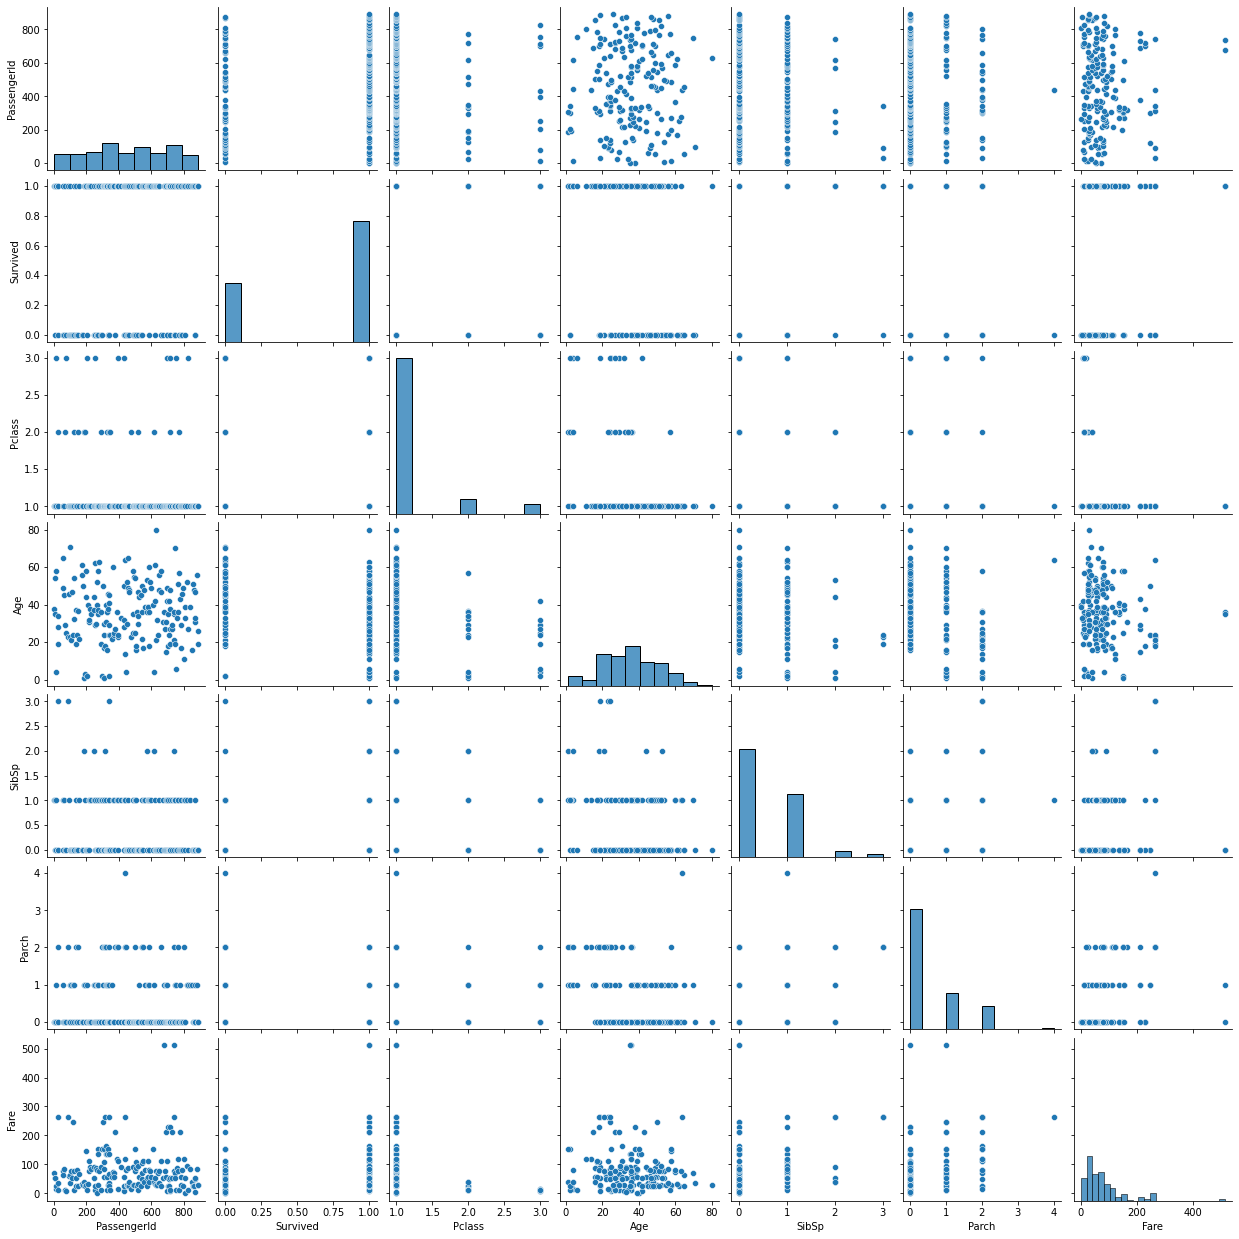

In [ ]:
sns.pairplot(data)
plt.show()

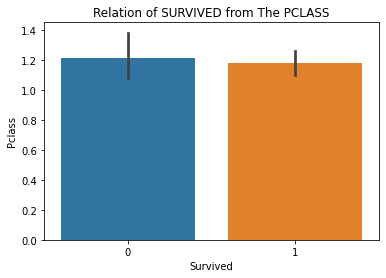

In [ ]:
sns.barplot(x="Survived",y="Pclass",data=data)
plt.title("Relation of SURVIVED from The PCLASS")
plt.show()

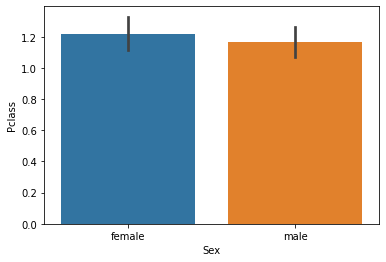

In [ ]:
sns.barplot(y="Pclass",x="Sex",data=data)
plt.show()

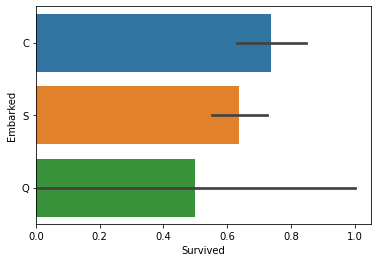

In [ ]:
sns.barplot(x="Survived",y="Embarked",data=data)
plt.show()

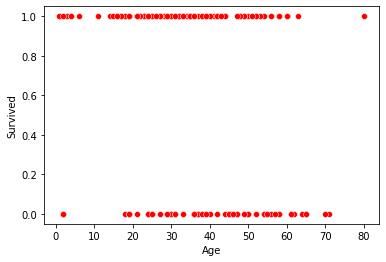

In [ ]:
sns.scatterplot(x="Age",y="Survived",data=data,color="red")
plt.show()

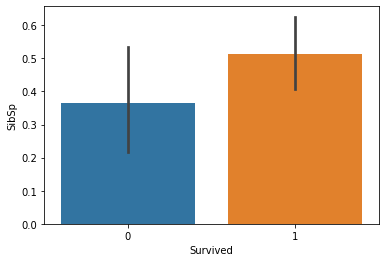

In [ ]:
sns.barplot(x="Survived",y="SibSp",data=data)
plt.show()

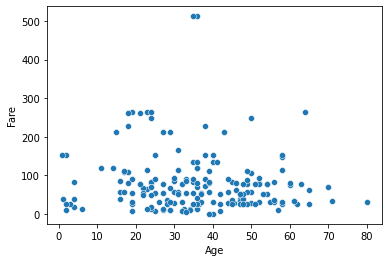

In [ ]:
sns.scatterplot(x="Age",y="Fare",data=data)
plt.show()

###  Majority of the Passanger are  having the ticket under 0 to 150 

# OUTLIEAR 
### For detaching the qutliear we have the two method that is IQR and Z-score method 
##### Here we are use the IQR method 
#### by using the boxplot we detect the outliear and by IQR we eliminate the outliear 



* Fare ticket cant be outliear fare ticket can be expensive in real world just for the fitting and better model we eliminate the outliear of the Fare Ticket 

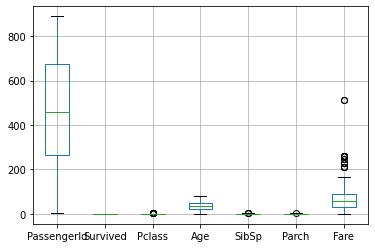

In [ ]:
data.boxplot()
plt.show()

In [ ]:
data["Fare"].unique()

array([ 71.2833,  53.1   ,  51.8625,  16.7   ,  26.55  ,  13.    ,
        35.5   , 263.    ,  76.7292,  61.9792,  83.475 ,  10.5   ,
         7.65  ,  61.175 ,  34.6542,  63.3583,  77.2875,  52.    ,
       247.5208,  26.2833,  79.2   ,  26.    ,  66.6   ,  33.5   ,
        30.6958,  28.7125,  39.    ,  27.7208, 146.5208,  10.4625,
        31.    , 113.275 ,  76.2917,  90.    ,  52.5542,  86.5   ,
        79.65  ,   0.    , 153.4625, 135.6333,  29.7   ,  77.9583,
        91.0792,  12.875 , 151.55  , 108.9   ,  56.9292,  83.1583,
       262.375 , 164.8667, 134.5   ,  57.9792,  28.5   ,  55.    ,
        75.25  ,  69.3   ,  55.4417, 211.5   , 120.    ,   8.05  ,
        55.9   ,  81.8583,  30.5   ,  27.75  ,  89.1042,  38.5   ,
        13.7917,  78.2667,  26.2875,  34.0208,  93.5   ,  49.5   ,
        71.    , 106.425 , 110.8833,  39.6   ,  51.4792,  26.3875,
        40.125 ,  32.3208,  30.    ,  25.5875, 512.3292, 211.3375,
        57.    , 227.525 ,  49.5042,  78.85  ,  12.475 ,  25.9

Outliear
     PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
438          439         0       1   
679          680         1       1   
689          690         1       1   
700          701         1       1   
716          717         1       1   
730          731         1       1   
737          738         1       1   
742          743         1       1   
779          780         1       1   

                                                  Name     Sex   Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
88                          Fortune, Miss. Mabel Helen  female  23.0      3   
118                           Baxter, Mr. Quigg Edmond    male  24.0      0   
299    Baxter, Mrs. James (H

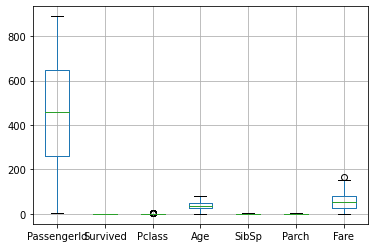

In [ ]:
# As we can see the fare containe the outliear by using he IQR method we are going to elemenate the outliear 
Q1=data["Fare"].quantile(0.25)
Q3=data["Fare"].quantile(0.75)

IQR=Q3-Q1  #interqurtile range 

#bound 
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# detecting the outliear 
outliear=data[(data["Fare"]<lower_bound)|( data["Fare"] >upper_bound)]
print("Outliear")
print(outliear)


# cleaned the outliear 
data_cleaned=data[(data["Fare"] >=lower_bound) & (data["Fare"] <= upper_bound)]

data_cleaned.boxplot()
plt.show()

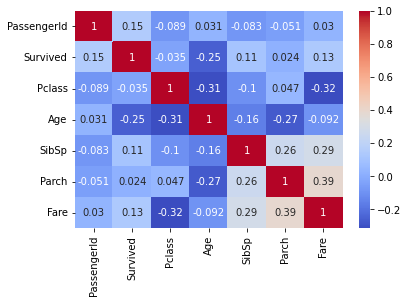

In [ ]:
# lets find the corellation between the variables 
corr=data.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
# step to identify the highly correlated features 
# find the pair with correlation >0.8
threshold=0.8
high_corr=corr[(corr>threshold) & (corr<1)]
print(f"highly correlation {high_corr}")

highly correlation              PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare
PassengerId          NaN       NaN     NaN  NaN    NaN    NaN   NaN
Survived             NaN       NaN     NaN  NaN    NaN    NaN   NaN
Pclass               NaN       NaN     NaN  NaN    NaN    NaN   NaN
Age                  NaN       NaN     NaN  NaN    NaN    NaN   NaN
SibSp                NaN       NaN     NaN  NaN    NaN    NaN   NaN
Parch                NaN       NaN     NaN  NaN    NaN    NaN   NaN
Fare                 NaN       NaN     NaN  NaN    NaN    NaN   NaN


In [ ]:
# now handel the categorcal we going to drop the name colume beacuse it make no sense to fit into the model
data=data.drop("Name",axis=1)

In [ ]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# label encoding 
for col in data.columns:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])


####  Now the data is cleaned and now we can move to the feature slection
######  from the above we can say that all the feature are not highly correlated to any one


In [ ]:
# feature selection
X=data.drop("Survived",axis=1)
Y=data["Survived"]

In [ ]:
# split the data  by using the train_test_split() 
X_train,x_test,Y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [ ]:
# fitting the model into the xgboost and then lg bost 
xgb_model=XGBClassifier()
xgb_model.fit(X_train,Y_train)
xgb_accuracy=xgb_model.score(x_test,y_test)
y_pred_xgb=xgb_model.predict(x_test)
print(f"ACCURACY :{xgb_accuracy}")

D:\anaconda\envs\deepl\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACCURACY :0.7297297297297297


In [ ]:
lgd_model=lgb.LGBMClassifier()
lgd_model.fit(X_train,Y_train)
lgd_accuracy=lgd_model.score(x_test,y_test)
y_pred=lgd_model.predict(x_test)

print(f"Accuracy : {lgd_accuracy}")

[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

D:\anaconda\envs\deepl\lib\site-packages\joblib\externals\loky\backend\context.py:152: UserWarning: Could not find the number of physical cores for the following reason:
__init__() got an unexpected keyword argument 'capture_output'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  "following reason:\n" + str(exception) + "\n"
  File "D:\anaconda\envs\deepl\lib\site-packages\joblib\externals\loky\backend\context.py", line 229, in _count_physical_cores
    capture_output=True)
  File "D:\anaconda\envs\deepl\lib\subprocess.py", line 423, in run
    with Popen(*popenargs, **kwargs) as process:


In [ ]:
print(f"The accuracy of the XGB is {xgb_accuracy}\nand the accuracy of the lgb is {lgd_accuracy}")

The accuracy of the XGB is 0.7297297297297297
and the accuracy of the lgb is 0.7297297297297297


In [ ]:
# now lets evalute both model by using the classification report 
reportxgb=classification_report(y_test,y_pred_xgb)
reportlgb=classification_report(y_test,y_pred)


print("XGB REPORT")
print(reportxgb)

print("LGB REPORT")
print(reportlgb)

XGB REPORT
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.76      0.83      0.79        23

    accuracy                           0.73        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37

LGB REPORT
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.76      0.83      0.79        23

    accuracy                           0.73        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37



####  Both performing same in the titanic_dataset 
###  Because fo small dataset 